In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data set has no null values

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [62]:
df['TotalCharges'].dtype

dtype('O')

The total charges is string type, we need to convert it into numerical

In [63]:
df['TotalCharges'][0:5]

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [64]:
df['MonthlyCharges'][0:5]

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [65]:
 # df['TotalCharges'] = df['TotalCharges'].astype(float)
    
# tried the above code, but there are few values with empty string

In [66]:
k=0
for i in df.TotalCharges:
    if len(i) == 1:
        print(k)
        
    k+=1

488
753
936
1082
1340
3331
3826
4380
5218
6670
6754


In [67]:
ind =  [488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]

for i in ind:
    print(df['TotalCharges'][i],type(df['TotalCharges'][i]))

  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>
  <class 'str'>


There is an empty space given, lets remove these rows.

In [68]:
copy = df.drop(index=ind)

In [69]:
copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
copy['TotalCharges'] = copy['TotalCharges'].astype(float)

In [71]:
copy.shape

(7032, 21)

In [72]:
copy.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [73]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [74]:
len(copy['customerID'].unique())

7032

We will remove the customer id column

In [75]:
for i in copy.columns:
    print(i, len(copy[i].unique()))

customerID 7032
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 72
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1584
TotalCharges 6530
Churn 2


We can see that there are only 4 columns with continuous data, remaining all are categorical data.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

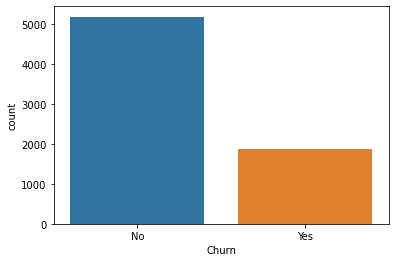

In [76]:
sns.countplot(df['Churn'])

The graph shows that the target column is not largely imbalanced.

In [77]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

 74 : 26 ratio for No : Yes

In [78]:
copy.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [79]:
copy.drop(columns = ['customerID'],inplace=True)

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\si

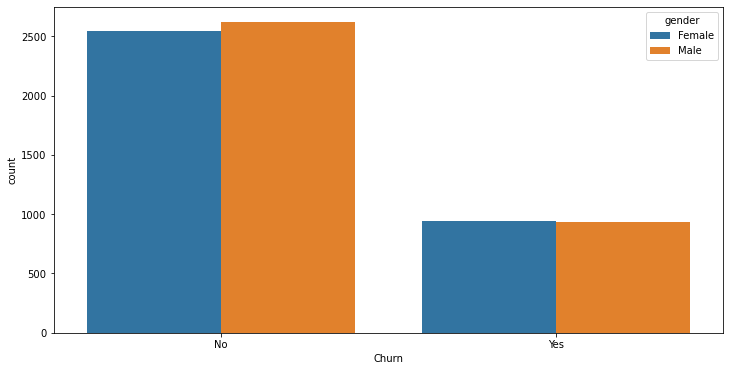

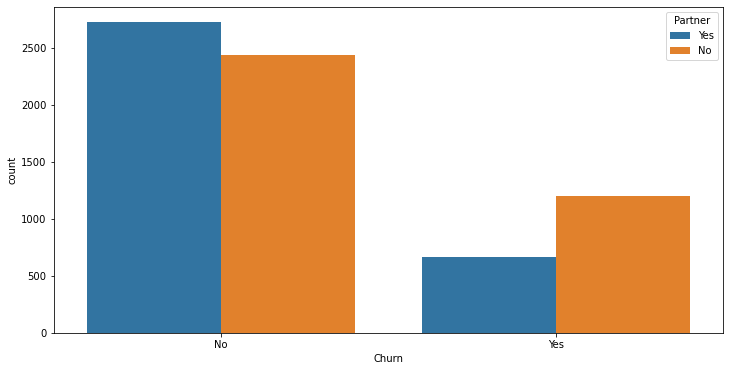

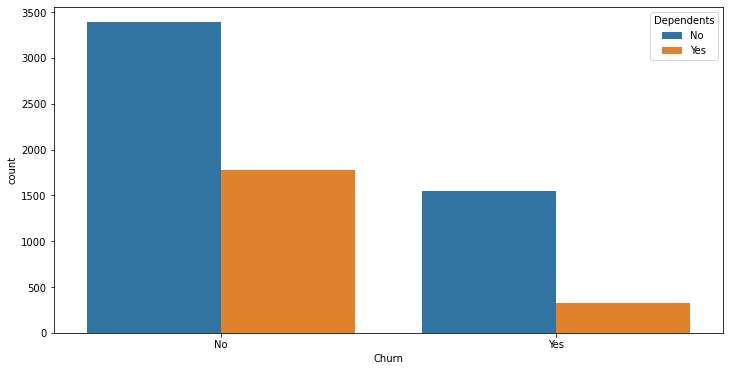

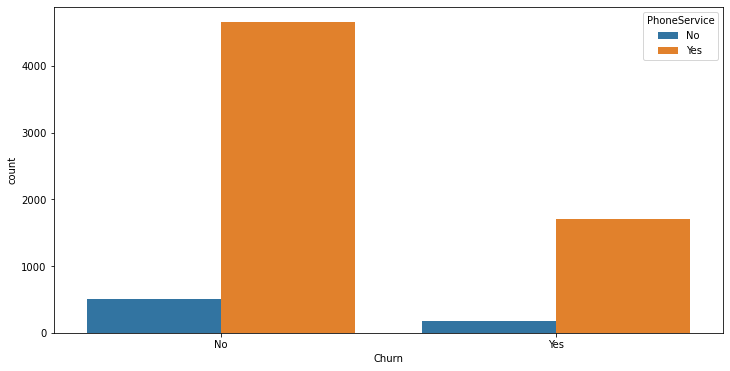

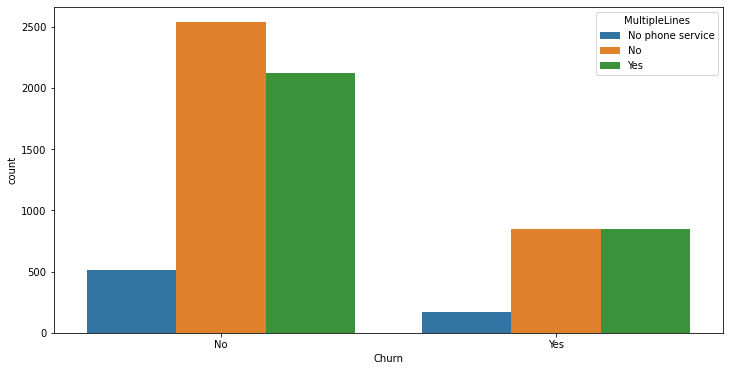

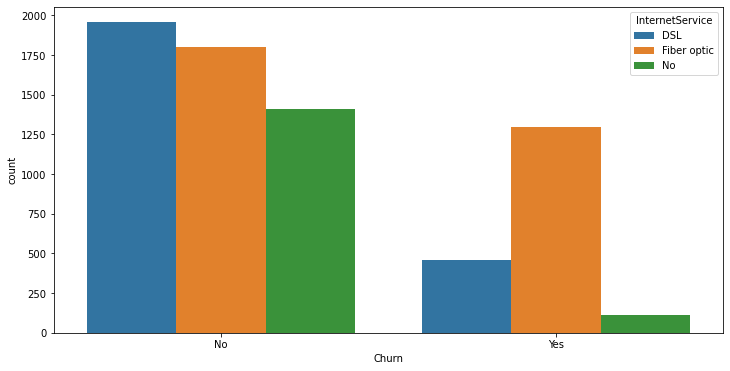

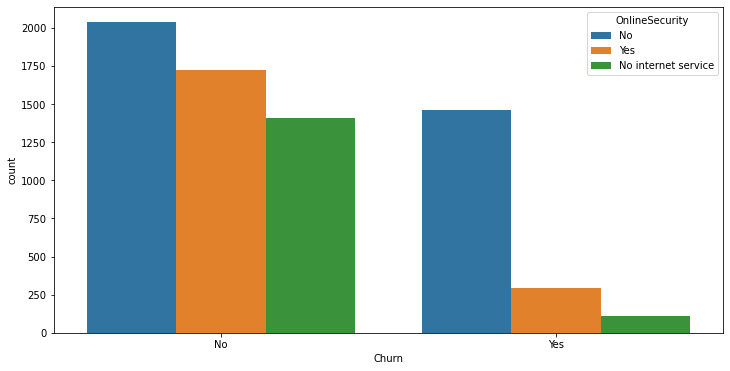

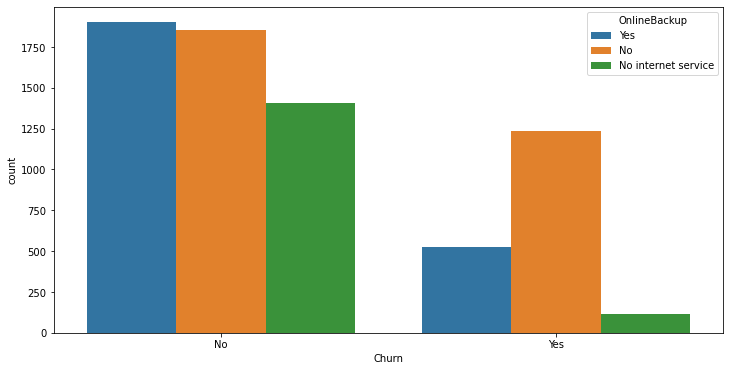

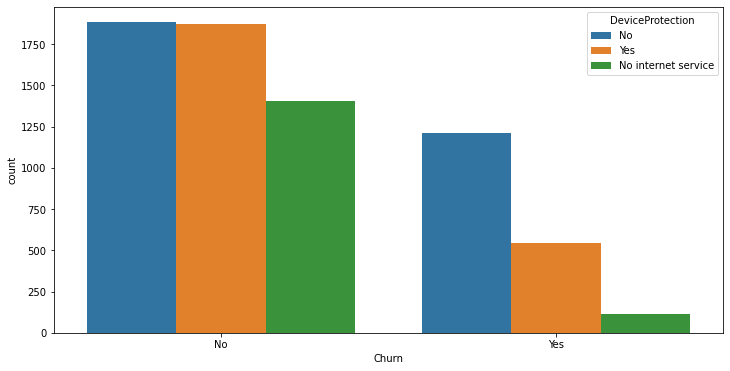

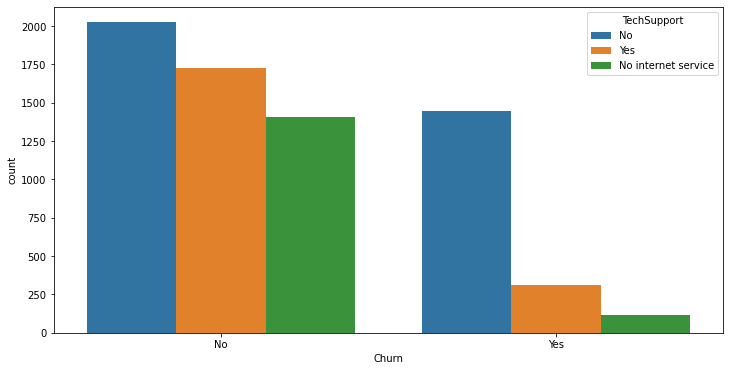

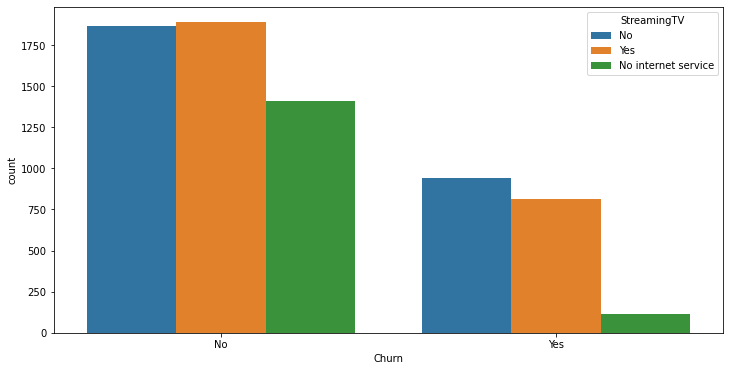

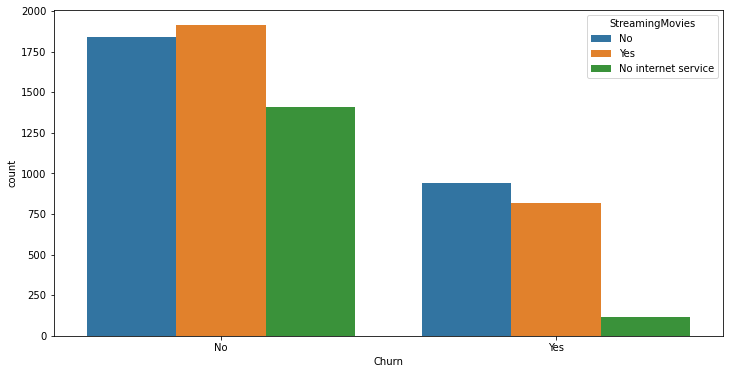

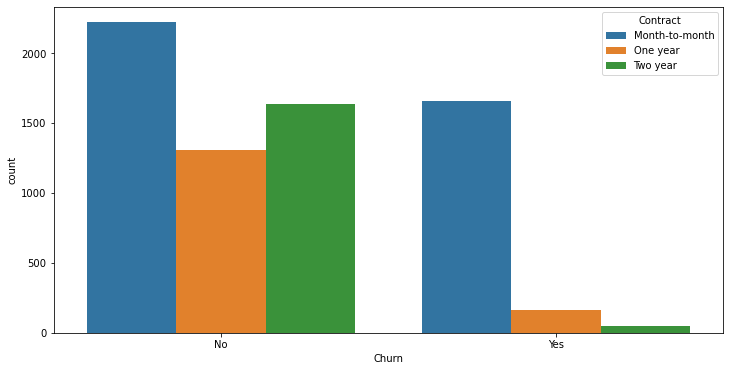

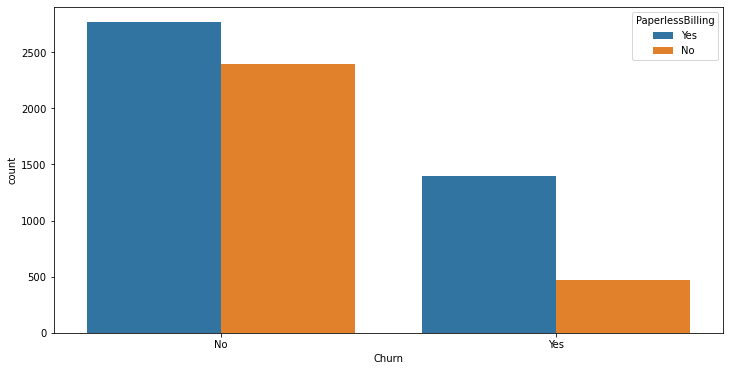

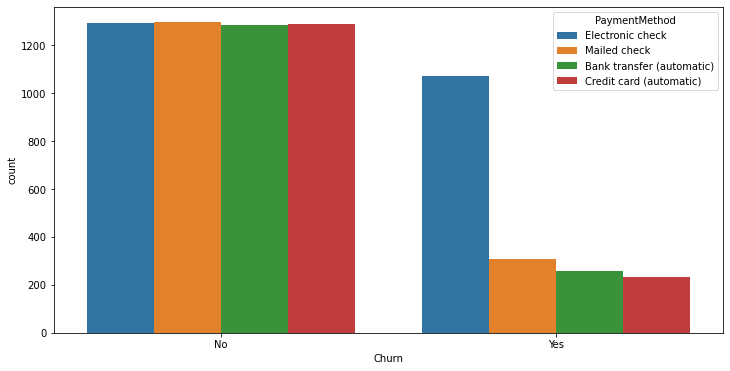

In [80]:
for i in copy.columns:
    if copy[i].dtype == 'object' and i != 'Churn':
        plt.figure(figsize = (12,6))
        sns.countplot(copy['Churn'],hue = df[i])

Male and females are almost equal in churn

Fiber optic has the highest amount of churn

No tech support has the highest churn

No online security has the highest churn

No online backup has the highest churn

No device protection has the highest churn

Month-to-Month contract has the highest churn

electronic check payment method has highest churn

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

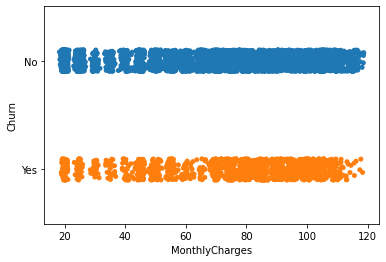

In [81]:
sns.stripplot(x=df['MonthlyCharges'],y=df['Churn'])

In [82]:
copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='tenure', ylabel='Churn'>

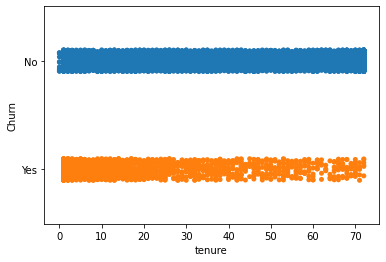

In [83]:
sns.stripplot(x=df['tenure'],y=df['Churn'])

In [84]:
copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Nulls have been removed.

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

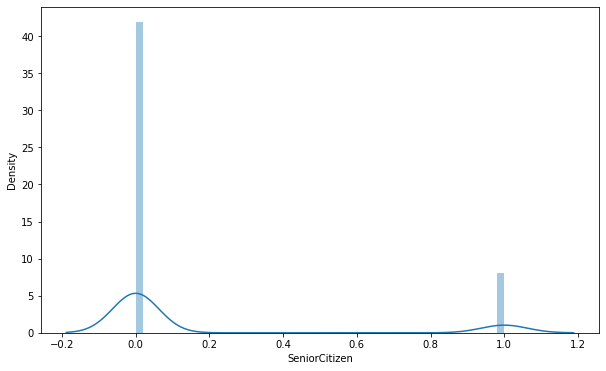

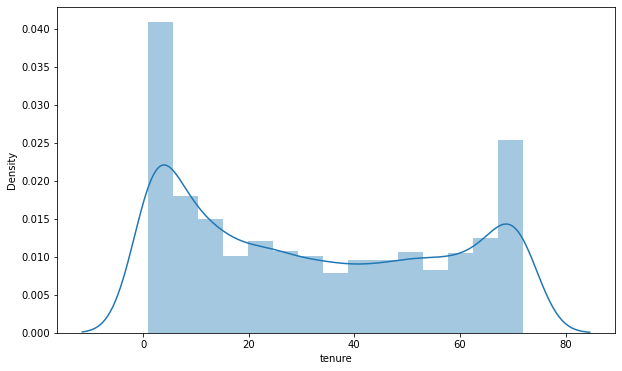

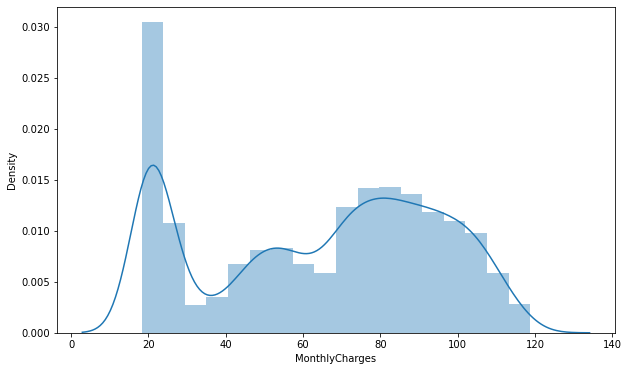

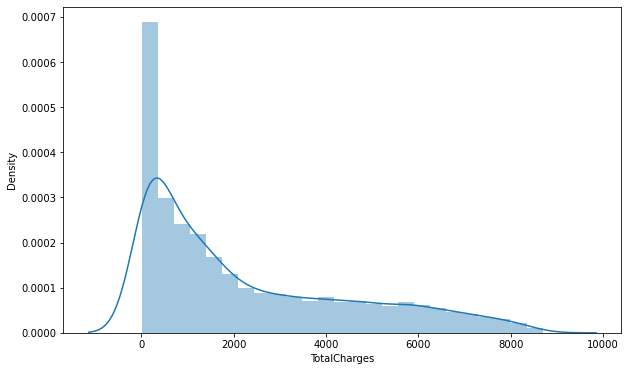

In [85]:
for i in copy.columns:
    if copy[i].dtype != 'object' and i != 'Churn':
        plt.figure(figsize = (10,6))
        sns.distplot(copy[i])

No variable is normally distributed.

In [86]:
copy.skew()

SeniorCitizen     1.831103
tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

The skewness is under acceptable range of -0.5 to 0.5 for tenure and monthly charges columns... but the distribution is not normal

Total charges is right skewed

In [87]:
np.cbrt(copy['TotalCharges']).skew()

0.012818570057014016

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

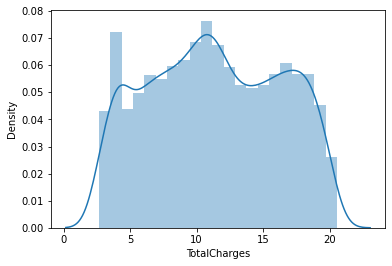

In [88]:
sns.distplot(np.cbrt(copy['TotalCharges']))

Though the skewness can be handled, still the distribution is not normal.

Before transforming lets check with outliers

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\si

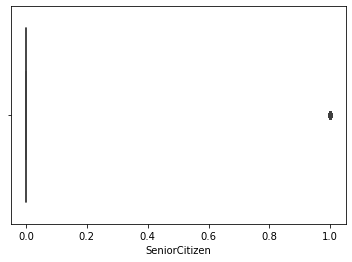

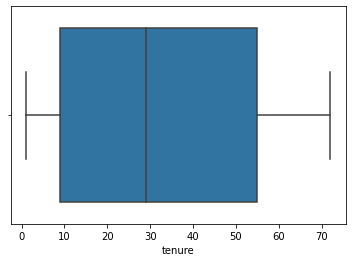

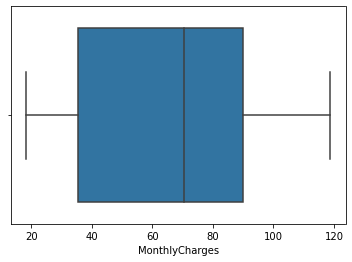

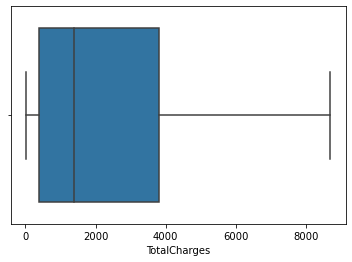

In [89]:
for i in copy.columns:
    if copy[i].dtype != 'object' and i != 'Churn':
        plt.subplots()
        sns.boxplot(copy[i])

Though, there is skewness, there are no outliers in the data

So, lets proceed with encoding the variables, without transforming the totalcharges column

In [90]:
copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
copy.shape

(7032, 20)

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
le =  LabelEncoder()

for i in copy.columns:
    if copy[i].dtype == 'object':
        copy[i] = le.fit_transform(copy[i])

In [94]:
copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [95]:
for i in copy.columns:
    print(i, copy[i].dtype)

gender int32
SeniorCitizen int64
Partner int32
Dependents int32
tenure int64
PhoneService int32
MultipleLines int32
InternetService int32
OnlineSecurity int32
OnlineBackup int32
DeviceProtection int32
TechSupport int32
StreamingTV int32
StreamingMovies int32
Contract int32
PaperlessBilling int32
PaymentMethod int32
MonthlyCharges float64
TotalCharges float64
Churn int32


In [97]:
for i in copy.columns:
    if copy[i].dtype == 'int32':
        print(i, copy[i].unique())

gender [0 1]
Partner [1 0]
Dependents [0 1]
PhoneService [0 1]
MultipleLines [1 0 2]
InternetService [0 1 2]
OnlineSecurity [0 2 1]
OnlineBackup [2 0 1]
DeviceProtection [0 2 1]
TechSupport [0 2 1]
StreamingTV [0 2 1]
StreamingMovies [0 2 1]
Contract [0 1 2]
PaperlessBilling [1 0]
PaymentMethod [2 3 0 1]
Churn [0 1]


multiple lines, internet service, online security etc; have  more than 2 values...

Lets use mean encoding. This encoding makes the value to match the mean with respect to target variable, for ex:-

In [99]:
copy.groupby(['MultipleLines'])['Churn'].mean()

MultipleLines
0    0.250812
1    0.250000
2    0.286485
Name: Churn, dtype: float64

Here in this case, it means that for value '0' the mean is 0.250812. The probability is 0.25 for churn to be yes

In [102]:
Mean_encoded_subject = copy.groupby(['MultipleLines'])['Churn'].mean().to_dict()
Mean_encoded_subject

{0: 0.25081240768094537, 1: 0.25, 2: 0.28648466464442196}

In [100]:
copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [101]:
enc_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [103]:
# mean encoding


for i in enc_cols:
    print(copy.groupby([i])['Churn'].count())
    print(copy.groupby([i])['Churn'].mean())
    Mean_encoded_subject = copy.groupby([i])['Churn'].mean().to_dict()
  
    copy[i] =  copy[i].map(Mean_encoded_subject)

gender
0    3483
1    3549
Name: Churn, dtype: int64
gender
0    0.269595
1    0.262046
Name: Churn, dtype: float64
SeniorCitizen
0    5890
1    1142
Name: Churn, dtype: int64
SeniorCitizen
0    0.236503
1    0.416813
Name: Churn, dtype: float64
Partner
0    3639
1    3393
Name: Churn, dtype: int64
Partner
0    0.329761
1    0.197171
Name: Churn, dtype: float64
Dependents
0    4933
1    2099
Name: Churn, dtype: int64
Dependents
0    0.312791
1    0.155312
Name: Churn, dtype: float64
PhoneService
0     680
1    6352
Name: Churn, dtype: int64
PhoneService
0    0.250000
1    0.267475
Name: Churn, dtype: float64
MultipleLines
0    3385
1     680
2    2967
Name: Churn, dtype: int64
MultipleLines
0    0.250812
1    0.250000
2    0.286485
Name: Churn, dtype: float64
InternetService
0    2416
1    3096
2    1520
Name: Churn, dtype: int64
InternetService
0    0.189983
1    0.418928
2    0.074342
Name: Churn, dtype: float64
OnlineSecurity
0    3497
1    1520
2    2015
Name: Churn, dtype: int64
O

In [104]:
copy.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.269595,0.236503,0.197171,0.312791,1,0.250000,0.250000,0.189983,0.417787,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854,29.85,29.85,0
1,0.262046,0.236503,0.329761,0.312791,34,0.267475,0.250812,0.189983,0.146402,0.399417,0.225393,0.416475,0.335351,0.337289,0.112772,0.163757,0.192020,56.95,1889.50,0
2,0.262046,0.236503,0.329761,0.312791,2,0.267475,0.250812,0.189983,0.146402,0.215670,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.192020,53.85,108.15,1
3,0.262046,0.236503,0.329761,0.312791,45,0.250000,0.250000,0.189983,0.146402,0.399417,0.225393,0.151961,0.335351,0.337289,0.112772,0.163757,0.167315,42.30,1840.75,0
4,0.269595,0.236503,0.329761,0.312791,2,0.267475,0.250812,0.418928,0.417787,0.399417,0.391403,0.416475,0.335351,0.337289,0.427097,0.335893,0.452854,70.70,151.65,1


The independent variables are encoded.

In [105]:
X = copy.drop(columns = ['Churn'])
Y = copy['Churn']

In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaledX = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [107]:
scaledX

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.009430,-0.440327,-1.035617,0.652305,-1.280248,-3.056334,-0.892514,-0.533049,0.991635,-0.388644,1.011400,0.995953,0.684258,0.701617,0.891603,0.828939,1.397784,-1.161694,-0.994194
1,-0.990658,-0.440327,0.965608,0.652305,0.064303,0.327189,-0.846579,-0.533049,-0.778836,1.036325,-0.325213,0.995953,0.684258,0.701617,-0.845735,-1.206361,-0.551174,-0.260878,-0.173740
2,-0.990658,-0.440327,0.965608,0.652305,-1.239504,0.327189,-0.846579,-0.533049,-0.778836,-0.388644,1.011400,0.995953,0.684258,0.701617,0.891603,0.828939,-0.551174,-0.363923,-0.959649
3,-0.990658,-0.440327,0.965608,0.652305,0.512486,-3.056334,-0.892514,-0.533049,-0.778836,1.036325,-0.325213,-0.752298,0.684258,0.701617,-0.845735,-1.206361,-0.735768,-0.747850,-0.195248
4,1.009430,-0.440327,0.965608,0.652305,-1.239504,0.327189,-0.846579,1.076926,0.991635,1.036325,1.011400,0.995953,0.684258,0.701617,0.891603,0.828939,1.397784,0.196178,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,-0.990658,-0.440327,-1.035617,-1.533025,-0.343137,0.327189,1.170401,-0.533049,-0.778836,1.036325,-0.325213,-0.752298,0.347825,0.331057,-0.845735,0.828939,-0.551174,0.664868,-0.129180
7028,1.009430,-0.440327,-1.035617,-1.533025,1.612573,0.327189,1.170401,1.076926,0.991635,-0.388644,-0.325213,0.995953,0.347825,0.331057,-0.845735,0.828939,-0.846234,1.276493,2.241056
7029,1.009430,-0.440327,-1.035617,-1.533025,-0.872808,-3.056334,-0.892514,-0.533049,-0.778836,1.036325,1.011400,0.995953,0.684258,0.701617,0.891603,0.828939,1.397784,-1.170004,-0.854514
7030,-0.990658,2.271039,-1.035617,0.652305,-1.158016,0.327189,1.170401,1.076926,0.991635,1.036325,1.011400,0.995953,0.684258,0.701617,0.891603,0.828939,-0.551174,0.319168,-0.872095


In [112]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(scaledX,Y, test_size = 0.3,random_state = 11)

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(xtrain,ytrain)
predlr = lr.predict(xtest)

print(accuracy_score(ytest,predlr))
print(confusion_matrix(ytest,predlr))
print(classification_report(ytest,predlr))

0.7890995260663507
[[1367  170]
 [ 275  298]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1537
           1       0.64      0.52      0.57       573

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110



In [114]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(xtrain,ytrain)
preddt = dtc.predict(xtest)

print(accuracy_score(ytest,preddt))
print(confusion_matrix(ytest,preddt))
print(classification_report(ytest,preddt))

0.7303317535545024
[[1246  291]
 [ 278  295]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1537
           1       0.50      0.51      0.51       573

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.73      0.73      0.73      2110



In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)
predrf = rf.predict(xtest)

print(accuracy_score(ytest,predrf))
print(confusion_matrix(ytest,predrf))
print(classification_report(ytest,predrf))

0.7701421800947867
[[1361  176]
 [ 309  264]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1537
           1       0.60      0.46      0.52       573

    accuracy                           0.77      2110
   macro avg       0.71      0.67      0.68      2110
weighted avg       0.76      0.77      0.76      2110



In [119]:
from sklearn.svm import SVC

sv = SVC()

sv.fit(xtrain,ytrain)
predsv = sv.predict(xtest)

print(accuracy_score(ytest,predsv))
print(confusion_matrix(ytest,predsv))
print(classification_report(ytest,predsv))

0.7834123222748816
[[1390  147]
 [ 310  263]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1537
           1       0.64      0.46      0.54       573

    accuracy                           0.78      2110
   macro avg       0.73      0.68      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [120]:
from sklearn.model_selection import cross_val_score

cvs1 = cross_val_score(lr,scaledX,Y,cv=5,scoring='f1').mean()
print('lr', cvs1)

cvs2 = cross_val_score(dtc,scaledX,Y,cv=5,scoring='f1').mean()
print('dtc',cvs2)

cvs3 = cross_val_score(rf,scaledX,Y,cv=5,scoring='f1').mean()
print('rf', cvs3)

cvs4 = cross_val_score(sv,scaledX,Y,cv=5,scoring='f1').mean()
print('svc', cvs4)



lr 0.6007228052640347
dtc 0.49532180906512274
rf 0.5527526071902552
svc 0.5749696649766942


The least difference, we got is for logisticregression 0.78 - 0.60

Lets tune parameters for logistic regression

In [126]:
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers,penalty=penalty,C=c_values)

GCV = GridSearchCV(LogisticRegression(), param_grid=grid, scoring='accuracy')

GCV.fit(xtrain,ytrain)

GCV.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [127]:
model = LogisticRegression(C = 100, solver = 'newton-cg')

model.fit(xtrain,ytrain)

pred = model.predict(xtest)

print(accuracy_score(ytest,pred))

0.7900473933649289


There isnt much increase in the accuracy score even after tuning the paramter

In [128]:
from sklearn.metrics import plot_roc_curve

Text(0.5, 0, 'False Positive rate')

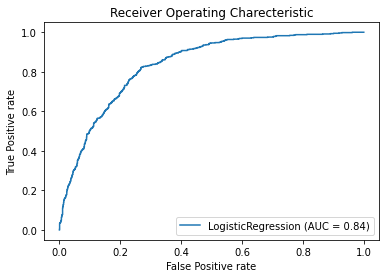

In [130]:
plot_roc_curve(model,xtest,ytest)
plt.title('Receiver Operating Charecteristic')
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')

Area under the curve is 0.84 ...

Near to 1 means the model is very good.

In [131]:
import pickle
filename = 'churn.pkl'
pickle.dump(model,open(filename,'wb'))

# Conclusion

We have cleaned the data without null values.

We have used mean encoding for this problem, though it has a chance of over fitting the model.

We have used four models and selected logistic regression as it has less difference with cross_val_score.

We have tuned the parameters for the losgistic regression and built a model with best parameters.

Roc curve has been plotted and auc is 0.84 which is good.

we saved the best model with best parameters.